# Number of confirmed cases of COVID-19 in Brazil

Main repository: https://github.com/wcota/covid19br/

Description of the data: https://github.com/wcota/covid19br/blob/master/DESCRIPTION.en.md

In [ ]:
# import packages
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plotting data

# import directly from GitHub
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

# change date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# print all available columns
print(df.columns)

# filter data for Brazil, and show only the specified columns
data_BR = df.query("state == 'TOTAL'")[['date', 'totalCases', 'deaths', 'suspects', 'recovered', 'tests', 'vaccinated', 'vaccinated_second']]

# create new columns
data_BR['activeCases'] = data_BR['totalCases'] - data_BR['deaths'] - data_BR['recovered']
data_BR['newVaccinated'] = data_BR['vaccinated'].diff()
data_BR['newVaccinated_second'] = data_BR['vaccinated_second'].diff()

# display the dataframe
data_BR

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100k_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100k_inhabitants'],
      dtype='object')


,date,totalCases,deaths,suspects,recovered,tests,vaccinated,vaccinated_second,activeCases,newVaccinated,newVaccinated_second
1,2020-02-25,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-26,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-02-27,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-02-28,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-02-29,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12585,2021-06-04,16852317,471191,6655234.0,14874923.0,49857892.0,48963900.0,22997889.0,1506203.0,642437.0,73860.0
12613,2021-06-05,16913984,472861,6655234.0,14944069.0,49878944.0,49491413.0,23095537.0,1497054.0,527513.0,97648.0
12641,2021-06-06,16954210,473735,6655234.0,15002817.0,49939952.0,49685501.0,23126008.0,1477658.0,194088.0,30471.0
12669,2021-06-07,16990262,474785,6655234.0,15022649.0,50029606.0,50381104.0,23232975.0,1492828.0,695603.0,106967.0


## Ranking of deaths and cases by month

In [ ]:
_df = df[df.state == "TOTAL"]
_df.groupby(_df['date'].dt.strftime('%b/%y'))['newDeaths'].sum().sort_values(ascending=False)

date
Apr/21    82392
Mar/21    66959
May/21    58714
Jul/20    32936
Feb/21    30531
Jun/20    30425
Jan/21    29576
Aug/20    28890
May/20    23387
Sep/20    22460
Dec/20    21804
Oct/20    15894
Jun/21    13783
Nov/20    13296
Apr/20     5778
Mar/20      202
Feb/20        0
Name: newDeaths, dtype: int64

In [ ]:
_df = df[df.state == "TOTAL"]
_df.groupby(_df['date'].dt.strftime('%b/%y'))['newCases'].sum().sort_values(ascending=False)

date
Mar/21    2205301
Apr/21    1911712
May/21    1882784
Jan/21    1527489
Feb/21    1349570
Dec/20    1339067
Jul/20    1257782
Aug/20    1244378
Sep/20     902536
Jun/20     896532
Nov/20     804202
Oct/20     720398
Jun/21     484310
May/20     429011
Apr/20      81302
Mar/20       5822
Feb/20          2
Name: newCases, dtype: int64

### Rankings by day


In [ ]:
_df = df[df.state == "TOTAL"]
_df.set_index("date")['newDeaths'].sort_values(ascending=False).head(10)

date
2021-04-08    4148
2021-04-06    4068
2021-03-31    3925
2021-04-13    3757
2021-04-09    3752
2021-04-07    3671
2021-04-01    3655
2021-03-30    3655
2021-03-26    3510
2021-04-15    3491
Name: newDeaths, dtype: int64

In [ ]:
_df = df[df.state == "TOTAL"]
_df.set_index("date")['newCases'].sort_values(ascending=False).head(10)

date
2021-03-25    98261
2021-06-02    96278
2021-03-24    90906
2021-03-31    88725
2021-04-07    88696
2021-03-17    88652
2021-04-08    88555
2021-03-19    88259
2021-04-09    88110
2021-01-07    87969
Name: newCases, dtype: int64

## Data at municipality level

In [ ]:
# import gzip file with cities data

df_cities = pd.read_csv("https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv.gz?raw=true", compression='gzip')
df_cities["date"] = pd.to_datetime(df_cities["date"])
df_cities.sample(10)

,epi_week,date,country,state,city,ibgeID,cod_RegiaoDeSaude,name_RegiaoDeSaude,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,last_info_date
1411003,103,2021-01-18,Brazil,RS,Cristal/RS,4306056,43021.0,Região 21 - Sul,0,4,0,309,49.58473,3830.42023,0.01294,SES,2021-06-01
1202267,50,2020-12-11,Brazil,BA,Ubatã/BA,2932309,29012.0,Itabuna,0,23,2,1203,84.36342,4412.57382,0.01912,SES,2021-06-06
1785021,112,2021-03-26,Brazil,MG,Barão de Cocais/MG,3105400,31021.0,Itabira,5,33,39,2504,100.40772,7618.81580,0.01318,MS,2021-06-08
400567,30,2020-07-21,Brazil,GO,Itapirapuã/GO,5211008,52012.0,Rio Vermelho,0,0,3,22,0.00000,469.58378,0.00000,SES,2021-06-05
2122867,121,2021-05-25,Brazil,MA,João Lisboa/MA,2105500,21008.0,Imperatriz,0,45,0,673,189.55350,2834.87784,0.06686,SES,2021-06-06
2120149,121,2021-05-24,Brazil,RN,Vila Flor/RN,2415008,24001.0,1ª Região de Saúde - São José de Mipibu,0,0,2,196,0.00000,6136.50595,0.00000,MS,2021-06-08
1496210,105,2021-02-02,Brazil,PI,Lagoa do Piauí/PI,2205581,22004.0,Entre Rios,0,2,0,376,49.07975,9226.99387,0.00532,SES,2021-06-06
809945,40,2020-10-02,Brazil,PE,Surubim/PE,2614501,26006.0,Limoeiro,1,33,5,1232,50.26886,1876.70419,0.02679,SES,2021-06-06
1392041,102,2021-01-14,Brazil,MG,São José da Barra/MG,3162948,31092.0,Passos,0,1,0,159,13.36898,2125.66845,0.00629,SES,2021-05-28
1152342,49,2020-12-03,Brazil,TO,Ananás/TO,1701002,17002.0,Bico do Papagaio,0,12,13,534,126.42225,5625.79014,0.02247,SES,2021-05-30


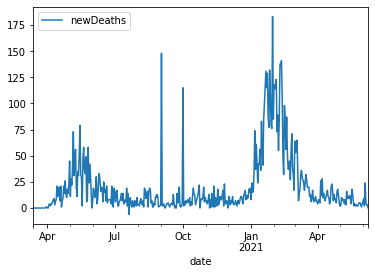

In [ ]:
df_cities[df_cities.city == "Manaus/AM"].plot(x="date", y="newDeaths")

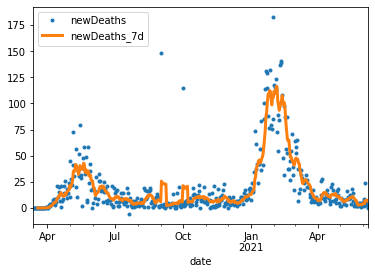

In [ ]:
ax = plt.gca()

_df = df_cities[df_cities.city == "Manaus/AM"].copy()
_df["newDeaths_7d"] = _df["newDeaths"].rolling(7).mean()

_df.plot(x = "date", y="newDeaths",marker=".",lw=0, ax=ax)
_df.plot(x = "date", y="newDeaths_7d",ax=ax,lw=3)

## Plotting some data

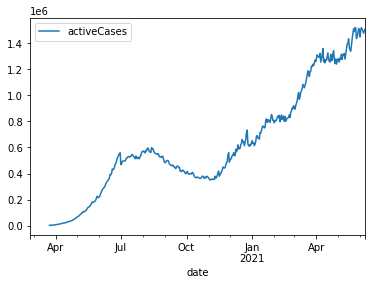

In [ ]:
data_BR.plot(x='date', y='activeCases')

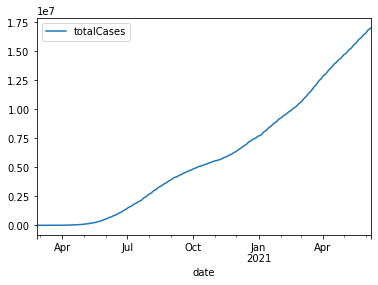

In [ ]:
data_BR.plot(x='date', y='totalCases')

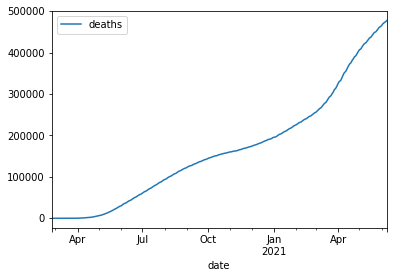

In [ ]:
data_BR.plot(x='date', y='deaths')

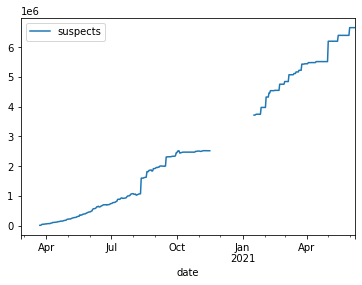

In [ ]:
data_BR.plot(x='date', y='suspects')

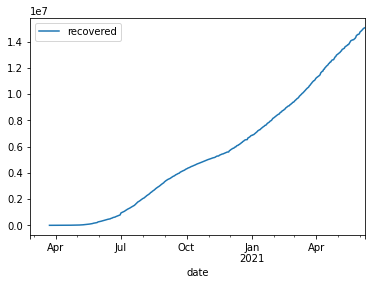

In [ ]:
data_BR.plot(x='date', y='recovered')

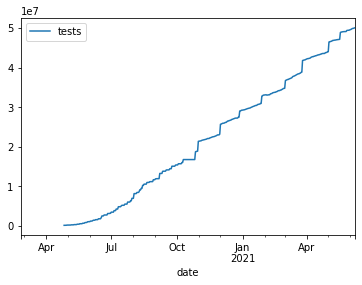

In [ ]:
data_BR.plot(x='date', y='tests')

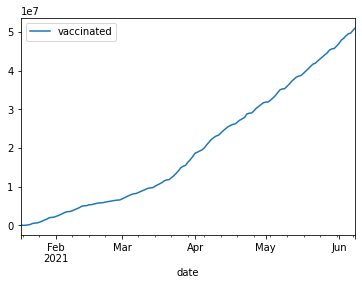

In [ ]:
data_BR[~data_BR.vaccinated.isna()].plot(x='date', y='vaccinated')

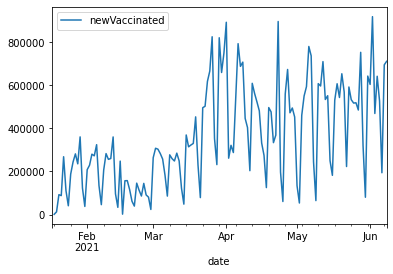

In [ ]:
data_BR[~data_BR.vaccinated.isna()].plot(x='date', y='newVaccinated')

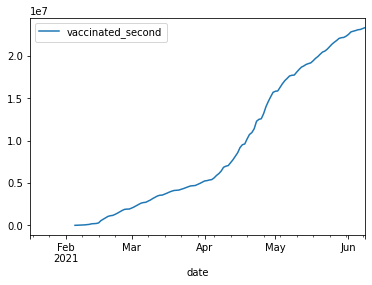

In [ ]:
data_BR[~data_BR.vaccinated.isna()].plot(x='date', y='vaccinated_second')

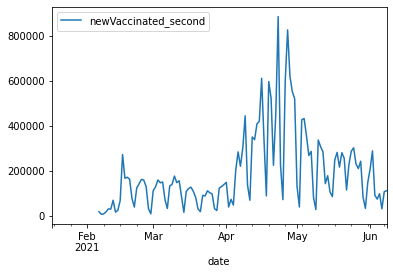

In [ ]:
data_BR[~data_BR.vaccinated.isna()].plot(x='date', y='newVaccinated_second')

## Vaccination data

In [ ]:
#@title
# pacotes para ver os dados
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
 
# gambiarra pra visualizar os gráficos interativos
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Total doses administered by day

In [ ]:
configure_plotly_browser_state()

df["vaccinated_total"] = df["vaccinated"] + df['vaccinated_second'].fillna(0)
 
fig = px.bar(df[(df.state != "TOTAL") & df.vaccinated_total.notna()], x="date", y="vaccinated_total", color="state", hover_data=['state'], barmode = 'stack')
 
fig.show()

### New doses administered by day

In [ ]:
configure_plotly_browser_state()

df["newVaccinated_total"] = df.groupby(['state'])['vaccinated_total'].diff()
 
fig = px.bar(df[(df.state != "TOTAL") & df.newVaccinated_total.notna()], x="date", y="newVaccinated_total", color="state", hover_data=['state'], barmode = 'stack')
 
fig.show()

### New doses administered by day, by federative unit

In [ ]:
configure_plotly_browser_state()

fig = go.Figure()
for state, _df in df[(df.state != "TOTAL") & df.vaccinated.notna()].groupby('state'):
  _df = _df.fillna(0)
  _df["vaccinated_total"] = _df["vaccinated_second"] + _df["vaccinated"]
  _df["newVaccinated_total"] = _df["vaccinated_total"].diff()
  fig.add_scatter(x=_df["date"], y = _df["newVaccinated_total"], name=state, mode='lines')

iplot(fig)

### New doses administered by day, by federative unit, moving average of 7 days

In [ ]:
configure_plotly_browser_state()

fig = go.Figure()
for state, _df in df[(df.state != "TOTAL") & df.vaccinated.notna()].groupby('state'):
  _df = _df.fillna(0)
  _df["vaccinated_total"] = _df["vaccinated_second"] + _df["vaccinated"]
  _df["newVaccinated_total"] = _df["vaccinated_total"].diff()
  fig.add_scatter(x=_df["date"], y = _df["newVaccinated_total"].rolling(7, min_periods=1).mean(), name=state, mode='lines')

iplot(fig)